# Лабораторная работа №10. Линейные стационарные системы

Возьмем пример кода из chap10.ipynb и дополним сигнал нулями чтобы избежать свертки.

In [66]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import read_wave

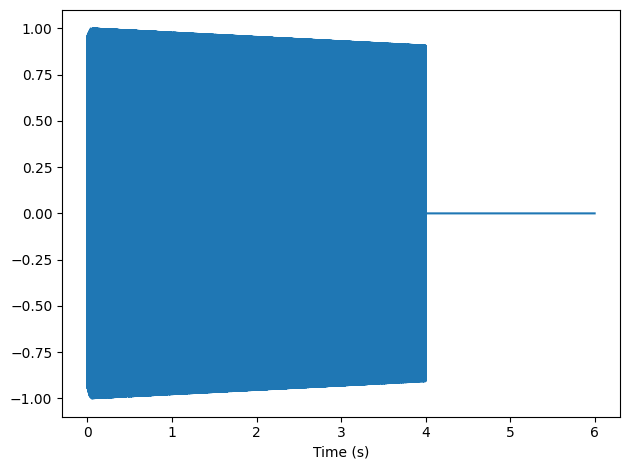

In [67]:
response = read_wave('18871__zippi1__sound-bell-440hz.wav')
start = 0.12
response = response.segment(start=start, duration=4)
response.shift(-start)

zero_num = int(response.framerate * response.duration * 1.5)
response.zero_pad(zero_num)
response.normalize()
response.plot()
decorate(xlabel='Time (s)')

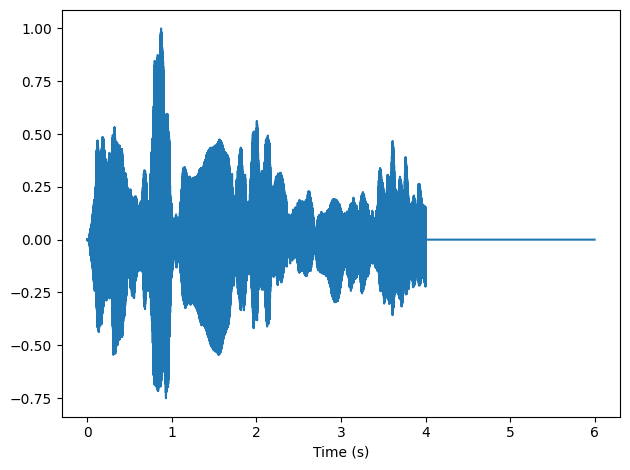

In [68]:
violin = read_wave('92002__jcveliz__violin-original.wav')
start = 0.11
violin = violin.segment(start=start, duration=4)
violin.shift(-start)

zero_num = int(violin.framerate * violin.duration * 1.5)
violin.zero_pad(zero_num)
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Вычислим спектр сигналов

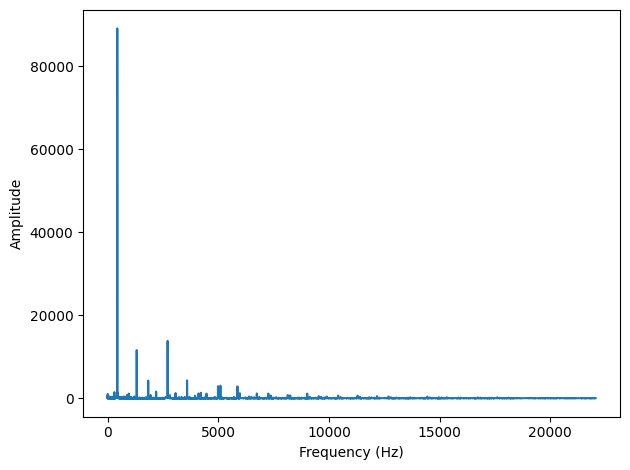

In [69]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

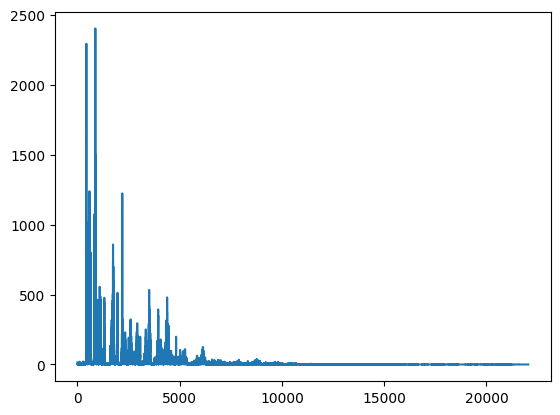

In [70]:
spectrum = violin.make_spectrum()
spectrum.plot()

Применим круговую свертку к сигналу и посмотрим, удалось ли избежать эффетка "заворота"

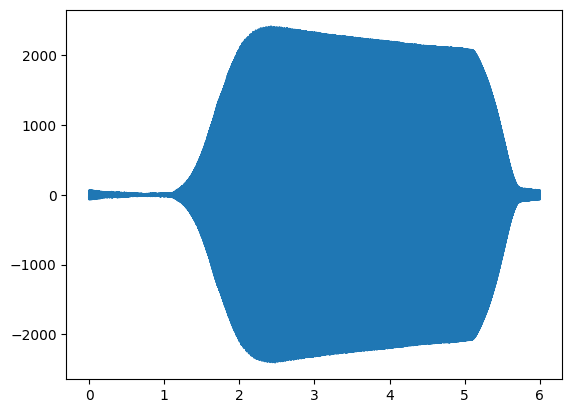

In [71]:
output = (spectrum * transfer).make_wave()
output.plot()
output.make_audio()

Теперь лишняя нота в начале сигнала не слышится

## Упражнение 10.2

Скачаем импельсную характеристику с сайта https://www.openairlib.net/. Была взята характеристика под названием "Falkland Palace Bottle Dungeon" по ссылке https://www.openair.hosted.york.ac.uk/?page_id=468

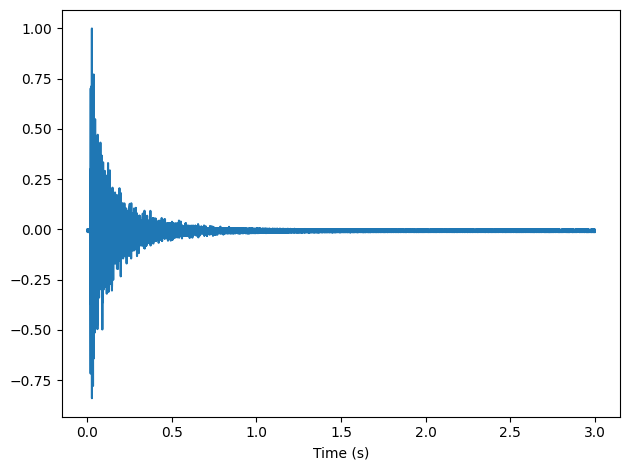

In [87]:
response = read_wave('bottledungeon_omni.wav')
response = response.segment(duration=5)
response.plot()
decorate(xlabel='Time (s)')
response.make_audio()

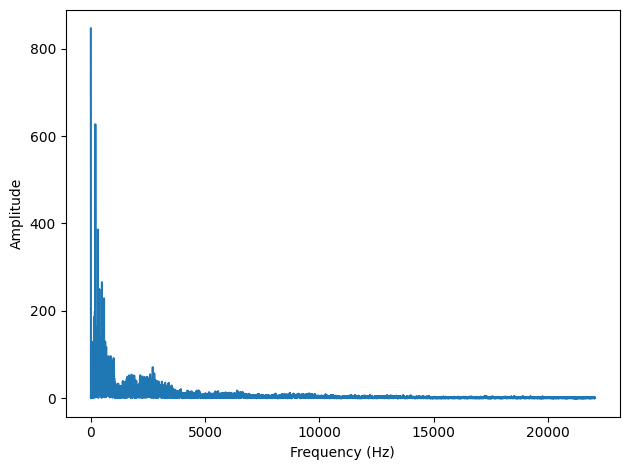

In [73]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Напечатаем передаточную функцию в логарифмическом масштабе

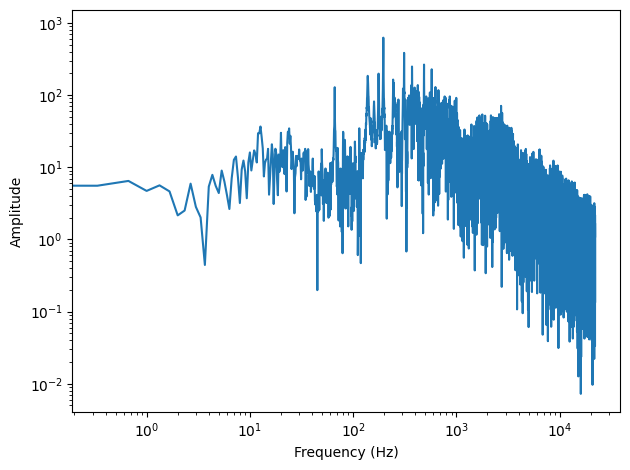

In [74]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', xscale='log', yscale='log')

Смоделируем звучание записи, если бы ее проиграли в том же месте

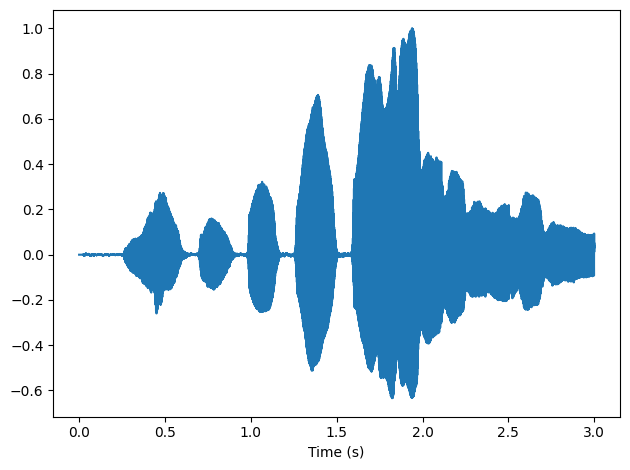

In [86]:
wave = read_wave('singing.wav')

wave.truncate(len(response))
wave.plot()
decorate(xlabel='Time (s)')
wave.make_audio()

Вычислим ДПФ записи:

In [76]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)
spectrum.fs

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       2.20493333e+04, 2.20496667e+04, 2.20500000e+04])

In [77]:
transfer.fs

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       2.20493333e+04, 2.20496667e+04, 2.20500000e+04])

Выполним умножение в частотной области и преобразуем обратно во временную область.

In [85]:
output = (spectrum * transfer).make_wave()
output.normalize()

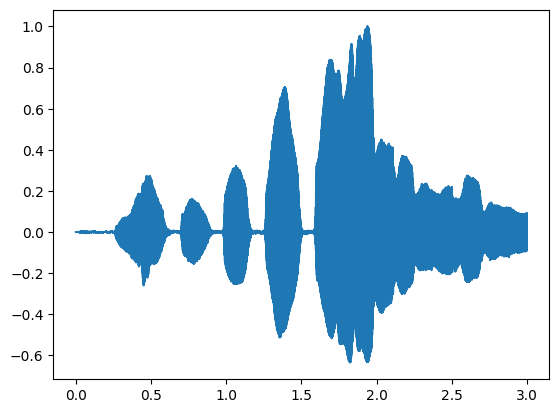

In [84]:
wave.plot()
wave.make_audio()

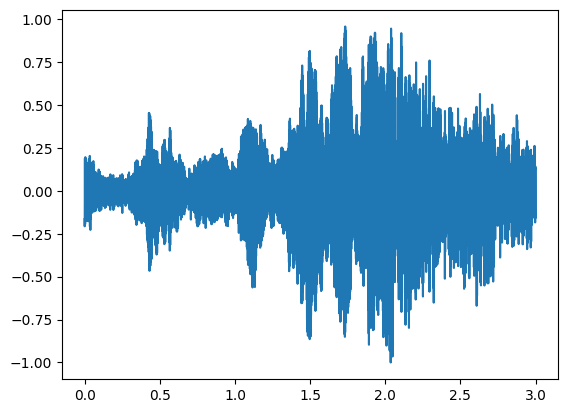

In [81]:
output.plot()
output.make_audio()

Вычислим данную операцию с помощью метода convolve

In [83]:
convolved = wave.convolve(response)
convolved.make_audio()